# Question 1
- Learn & Understand Zip's Law.

###### Pick file in NLTK Package 
###### Proof if Zip's Law work in NLTK package or not.

In [1]:
import nltk
fileid = nltk.corpus.brown.categories()

In [2]:
# Cleaning file.
import re
def clean(elem):
    punct = re.compile('\W+|(\d+)')
    return  re.match(punct, elem)

webWords = nltk.corpus.brown.words(categories='humor')
cleanList = [word.lower() for word in webWords if not clean(word)]
wordLen = len(cleanList)
print(wordLen)
frequency={}
for word in cleanList:
    count = frequency.get(word,0)
    frequency[word] = count + 1
sortedDict = sorted(frequency.items(), key=lambda x: (-x[1], x[0])) # sorted is used to sort dictionary in descending order.
print(sortedDict[:10])

18258
[('the', 1027), ('and', 529), ('a', 523), ('of', 518), ('to', 465), ('in', 360), ('was', 276), ('that', 252), ('i', 239), ('it', 210)]


In [10]:
A = 0.1
i = 1
rankList = []
for rank in range(len(sortedDict)):
    wordRank = (A * wordLen) / (sortedDict[rank][1] * i)
    wR = float("{0:.2f}".format(wordRank))
    obj1 = sortedDict[rank]
    obj2 = list(obj1)
    obj2.append(wR)
    obj3 = tuple(obj2)
    rankList.append(obj3)
    i = i+1
    


In [11]:
import csv
fileName = 'C:/Users/rohit/Desktop/'+ fileid[0]+ ".csv"
with open(fileName, 'w', newline='') as fp:
    a = csv.writer(fp, delimiter=',')
    a.writerow(["Word", "Frequency", "Rank"])
    a.writerows(rankList)

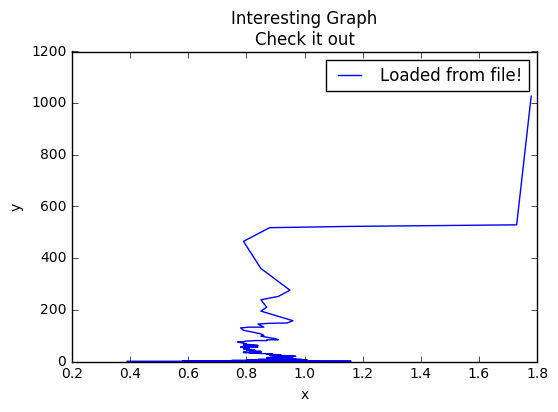

In [17]:
import matplotlib.pyplot as plt

x = []
y = []

with open(fileName,'r') as csvfile:
    plots = csv.reader(csvfile, delimiter=',')
    next(csvfile)
    for row in plots:
        x.append(float(row[2]))
        y.append(int(row[1]))
        
plt.plot(x,y, label='Loaded from file!')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Interesting Graph\nCheck it out')
plt.legend()
plt.show()